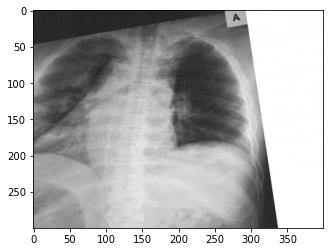

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 ##convert images into arrays

DATADIR = "C:/Covid Data/TrainData"
CATEGORIES = ["COVID-19","Normal"]##labels
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)##reading folders
    for img in os.listdir(path):##reading images inside folders
        ##CTSCANs are not color images but still if i want to check with any colored scan reports it would be easy if i convert into gray scale 
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)##image to array
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break


In [2]:
print(img_array.shape)

(300, 400)


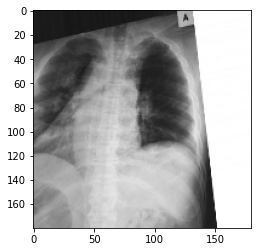

In [3]:
IMG_SIZE =180## reports can be of any image size. if i dont use a specific image size it makes problem in scaling also returns noises that makes hard to predict using my model
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [4]:
training_data = []##adding datas in a list
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)#converting labels into binary index
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])##features and labels
            except Execution as e:
                pass
create_training_data()
           
    

In [5]:
print(len(training_data))

961


In [6]:
import random
random.shuffle(training_data)

In [7]:
for sample in training_data[:10]:
    print(sample[1])


1
1
1
1
1
1
1
1
1
1


In [8]:
X=[]
y=[]
for features,labels in training_data:
    X.append(features)
    y.append(labels)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
    

In [9]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [10]:
pickle_in =open("X.pickle","rb")
X=pickle.load(pickle_in)
X[1]

array([[[ 43],
        [ 43],
        [ 43],
        ...,
        [  0],
        [  0],
        [  0]],

       [[ 43],
        [ 43],
        [ 43],
        ...,
        [  0],
        [  0],
        [  0]],

       [[ 43],
        [ 43],
        [ 43],
        ...,
        [  0],
        [  0],
        [  0]],

       ...,

       [[  0],
        [  0],
        [  0],
        ...,
        [160],
        [157],
        [140]],

       [[  0],
        [  0],
        [  0],
        ...,
        [163],
        [157],
        [147]],

       [[  0],
        [  0],
        [  0],
        ...,
        [158],
        [141],
        [140]]], dtype=uint8)

In [11]:
pickle_in =open("y.pickle","rb")
y=pickle.load(pickle_in)
y[1]

1